In [15]:
import tensorflow as tf

print(tf.__version__)

2.13.0


# Tensorflow Variable Examples

In [18]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [20]:
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [22]:
# Operator overloading is supported
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [24]:
# Can specify a data type for tf variables
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0, dtype=tf.float32)

c = a+b
print(c)

tf.Tensor(7.0, shape=(), dtype=float32)


In [26]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)
print(type(c))

12.0
<class 'numpy.float32'>


In [28]:
# Obtain numpy value from a tensor:
print(a.numpy())
print(type(a))
print(type(a.numpy()))

3.0
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.float32'>


# Simple Neural Network with Keras

(10000, 1)
(10000, 1)


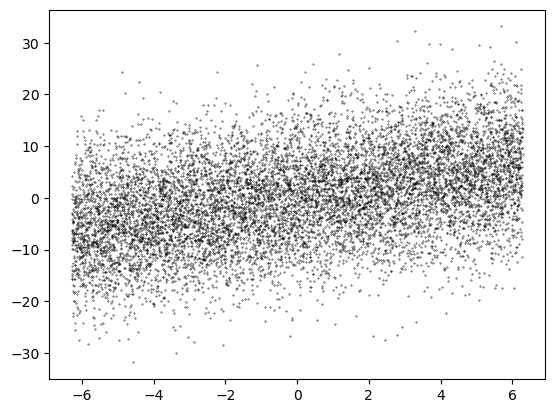

In [31]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = inputs + 8 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [39]:
print(inputs)
print(inputs[:, 0])

[[-6.28318531]
 [-6.28192854]
 [-6.28067178]
 ...
 [ 6.28067178]
 [ 6.28192854]
 [ 6.28318531]]
[-6.28318531 -6.28192854 -6.28067178 ...  6.28067178  6.28192854
  6.28318531]


In [9]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [10]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)
print(linear_predictions)

tf.Tensor(
[[ 10.795901]
 [ 10.793741]
 [ 10.791581]
 ...
 [-10.791581]
 [-10.793741]
 [-10.795901]], shape=(10000, 1), dtype=float32)


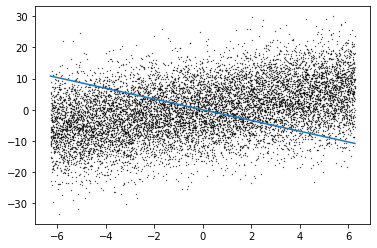

In [11]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0])

In [12]:
# Get Loss from library
example_loss = tf.keras.losses.MeanSquaredError()
# Compile the model with an optimizer
linear_model.compile(optimizer='SGD',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [13]:
linear_model.fit(inputs,outputs,epochs=2)

Epoch 1/2
313/313 [==============================] - 1s 786us/step - loss: 64.7632 - mean_squared_error: 64.7632
Epoch 2/2
313/313 [==============================] - 0s 708us/step - loss: 64.1197 - mean_squared_error: 64.1197


In [14]:
linear_predict = linear_model.predict(inputs)

313/313 [==============================] - 0s 556us/step


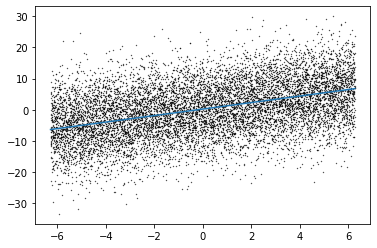

In [15]:
# Plot the trained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predict[:, 0])

## Utilizing a more Complecated Example

(10000, 1)
(10000, 1)


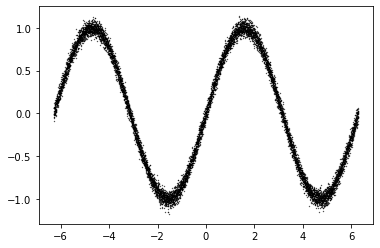

In [16]:
# Input data
import numpy as np
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [17]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1,"sigmoid")])

In [18]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)
print(linear_predictions)

tf.Tensor(
[[0.47307542]
 [0.47308078]
 [0.47308615]
 ...
 [0.5269138 ]
 [0.5269192 ]
 [0.5269246 ]], shape=(10000, 1), dtype=float32)


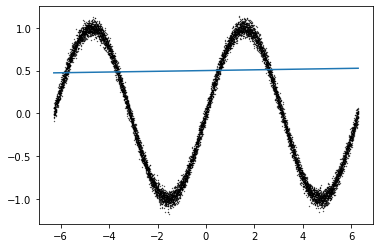

In [19]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0])

In [20]:
# Compile the model with an optimizer
linear_model.compile(optimizer='SGD',
                     loss=example_loss,
                     metrics=['mean_squared_error'])
linear_model.fit(inputs,outputs,epochs=2)
linear_predict = linear_model.predict(inputs)

Epoch 1/2
313/313 [==============================] - 0s 635us/step - loss: 0.6332 - mean_squared_error: 0.6332
Epoch 2/2
313/313 [==============================] - 0s 686us/step


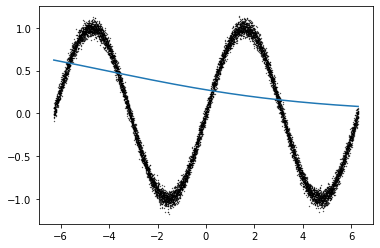

In [21]:
# Plot the trained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predict[:, 0])

Basic layer is linear, can change activation to see different outputs

Arguments when initalizing a dense layer
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

Train Example

In [22]:
inputs

array([[-6.28318531],
       [-6.28192854],
       [-6.28067178],
       ...,
       [ 6.28067178],
       [ 6.28192854],
       [ 6.28318531]])

In [23]:
# Create a Deep Model
sample_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=[1,]),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

In [24]:
# Compile the model with an optimizer
sample_model.compile(optimizer='adam',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [25]:
# Can print out the details of the model after compileing
sample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [26]:
sample_model.fit(inputs,outputs,epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.4069 - mean_squared_error: 0.4069
Epoch 2/5
313/313 [==============================] - 0s 724us/step - loss: 0.2705 - mean_squared_error: 0.2705
Epoch 3/5
313/313 [==============================] - 0s 749us/step - loss: 0.1563 - mean_squared_error: 0.1563
Epoch 4/5
313/313 [==============================] - 0s 2ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0935 - mean_squared_error: 0.0935


In [27]:
sample_predict = sample_model.predict(inputs)

313/313 [==============================] - 0s 872us/step


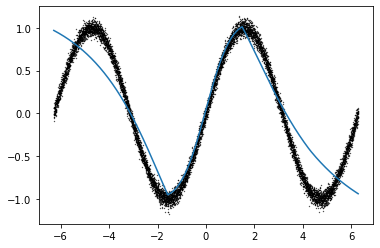

In [ ]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], sample_predict[:, 0])